# Market Breadth
-  หาจำนวนหุ้นใน SET50 ที่มีการปรับตัวราคาเป็นบวกและลบเพื่อดูแนวโน้มของดัชนี

In [21]:
import sys
import os

# กำหนด path ไปยังโฟลเดอร์ 'libs' ที่อยู่ข้างนอกของ 'subfolder'
# ใช้ os.path.abspath สำหรับการรับ absolute path
libs_path = os.path.abspath(os.path.join(os.getcwd(), '..', ''))

# ใส่ path นี้ไปที่ตำแหน่งแรกใน sys.path เพื่อให้ Python ค้นหาที่นี่ก่อน
if libs_path not in sys.path:
    sys.path.insert(0, libs_path)

import starfishXapi as sx
from starfishXapi.set_api import indexType
sx.enable_autoreload()
print(sx.__version__)

Autoreload enabled.
0.00103


In [22]:
# สร้าง object dataReader
dataReader = sx.HistStockPrice()
dataReader.openLog(directory='cache/') # สร้าง folder cache/

*you are using nologin method, data you access may be limited


False

In [23]:
# หาสมาชิกในดัชนี set100
member = sx.get_member_of_index(indexType.set50)
for i in member['symbol']:
   print(f'{i},',end='')

ADVANC,AOT,AWC,BBL,BCP,BDMS,BEM,BGRIM,BH,BJC,BTS,CBG,CENTEL,CPALL,CPF,CPN,CRC,DELTA,EA,EGCO,GLOBAL,GPSC,GULF,HMPRO,INTUCH,ITC,IVL,KBANK,KTB,KTC,LH,MINT,MTC,OR,OSP,PTT,PTTEP,PTTGC,RATCH,SCB,SCC,SCGP,TIDLOR,TISCO,TLI,TOP,TRUE,TTB,TU,WHA,

In [157]:
import time
import pandas as pd
import numpy as np

start_date = '2024-01-01'
stop_date = '2024-09-12'  
folder = 'cache/'

# preprocess data Load to Cache
for i in member['symbol']:
  df = dataReader.getPrice(i,start=start_date,stop=stop_date,cache=True)
  print(i,end=',')  

ADVANC,AOT,AWC,BBL,BCP,BDMS,BEM,BGRIM,BH,BJC,BTS,CBG,CENTEL,CPALL,CPF,CPN,CRC,DELTA,EA,EGCO,GLOBAL,GPSC,GULF,HMPRO,INTUCH,ITC,IVL,KBANK,KTB,KTC,LH,MINT,MTC,OR,OSP,PTT,PTTEP,PTTGC,RATCH,SCB,SCC,SCGP,TIDLOR,TISCO,TLI,TOP,TRUE,TTB,TU,WHA,

In [136]:
# preprocess data2
m = {}
for i in member['symbol']:
  df = dataReader.getPrice(i,start=start_date,stop=stop_date,cache=True)
  k = df['close'] - df['close'].shift(1)  
  m[i] = k

In [137]:
v = df['Date'].values

In [139]:
m1 = pd.DataFrame(m)
m1['Date'] = v
m1 = m1.set_index('Date')
m1

ADVANC   AOT   AWC  BBL   BCP  BDMS   BEM     BGRIM   BH  \
Date                                                                   
2024-01-02     NaN   NaN   NaN  NaN   NaN   NaN   NaN       NaN  NaN   
2024-01-03     1.0  0.25  0.20 -1.0 -1.50 -0.25  0.00  0.000000 -1.0   
2024-01-04     0.0  1.50  0.20  0.0  0.50 -0.25  0.10  0.250000  2.0   
2024-01-05    -5.0 -0.50  0.10  1.0 -0.50  0.25 -0.10 -1.250000  3.0   
2024-01-08     0.0 -0.50 -0.02 -1.0  1.00  0.00 -0.05 -0.750000 -1.0   
...            ...   ...   ...  ...   ...   ...   ...       ...  ...   
2024-09-06     2.0  0.75  0.12  8.0  0.75  0.50  0.05  0.900002  8.0   
2024-09-09    -9.0 -0.75  0.00  1.5  1.00  0.50  0.15  0.099998  1.0   
2024-09-10    -1.0 -0.25 -0.06  1.0 -1.00  0.25  0.05 -0.199999 -2.0   
2024-09-11     0.0 -0.25 -0.06  1.0 -0.75 -0.75 -0.05  0.300000 -1.0   
2024-09-12     0.0  0.00  0.06  1.0  0.00  0.50  0.10  0.000000  2.0   

                 BJC  ...   SCC  SCGP    TIDLOR  TISCO   TLI   TOP  TRUE  \
Date                  ...                                                  
2024-01-02       NaN  ...   NaN   NaN       NaN    NaN   NaN   NaN   NaN   
2024-01-03  0.750000  ...  -1.0  0.50  0.771429   0.50  0.30 -0.25  0.05   
2024-01-04  1.000000  ...   1.0 -0.50 -0.192856  -0.25 -0.05  0.25 -0.05   
2024-01-05  0.500000  ...  -2.0 -1.00 -0.192858   0.25  0.15  0.50  0.00   
2024-01-08 -1.250000  ...  -3.0  0.00 -0.096429   1.00 -0.35 -1.25  0.00   
...              ...  ...   ...   ...       ...    ...   ...   ...   ...   
2024-09-06  0.699999  ...  10.0  0.75  1.199999   2.25  0.30  0.00  0.00   
2024-09-09 -0.099998  ...  -2.0  0.75 -0.500000   0.50  0.05  0.50 -0.20   
2024-09-10  0.000000  ...  -5.0 -0.50 -0.300000  -2.75 -0.05 -0.50 -0.20   
2024-09-11 -0.200001  ...  -3.0  0.25 -0.300001  -0.75 -0.10 -1.75  0.00   
2024-09-12 -0.400000  ...  -2.0 -0.75  0.000000   0.50  0.00 -1.25  0.10   

             TTB   TU   WHA  
Date                         
2024-01-02   NaN  NaN   NaN  
2024-01-03 -0.02  0.1 -0.05  
2024-01-04  0.00 -0.1  0.00  
2024-01-05  0.01 -0.1  0.05  
2024-01-08 -0.04 -0.1 -0.19  
...          ...  ...   ...  
2024-09-06  0.09 -0.1 -0.05  
2024-09-09  0.06  0.1  0.10  
2024-09-10  0.02 -0.1  0.10  
2024-09-11 -0.02 -0.2 -0.15  
2024-09-12  0.00  0.1  0.05  

[171 rows x 50 columns]

In [140]:
m2 = {}
for i in member['symbol']:
  count = []
  for j in m1[i]:
    if(j>0):
      count.append(1)
    elif(j==0):
      count.append(0)  
    elif(j<0):
      count.append(-1) 
    else:
      count.append(0) 
  m2[i] = count

m2 = pd.DataFrame(m2)
m2['Date'] = v
m2 = m2.set_index('Date')
m2

ADVANC  AOT  AWC  BBL  BCP  BDMS  BEM  BGRIM  BH  BJC  ...  SCC  \
Date                                                               ...        
2024-01-02       0    0    0    0    0     0    0      0   0    0  ...    0   
2024-01-03       1    1    1   -1   -1    -1    0      0  -1    1  ...   -1   
2024-01-04       0    1    1    0    1    -1    1      1   1    1  ...    1   
2024-01-05      -1   -1    1    1   -1     1   -1     -1   1    1  ...   -1   
2024-01-08       0   -1   -1   -1    1     0   -1     -1  -1   -1  ...   -1   
...            ...  ...  ...  ...  ...   ...  ...    ...  ..  ...  ...  ...   
2024-09-06       1    1    1    1    1     1    1      1   1    1  ...    1   
2024-09-09      -1   -1    0    1    1     1    1      1   1   -1  ...   -1   
2024-09-10      -1   -1   -1    1   -1     1    1     -1  -1    0  ...   -1   
2024-09-11       0   -1   -1    1   -1    -1   -1      1  -1   -1  ...   -1   
2024-09-12       0    0    1    1    0     1    1      0   1   -1  ...   -1   

            SCGP  TIDLOR  TISCO  TLI  TOP  TRUE  TTB  TU  WHA  
Date                                                           
2024-01-02     0       0      0    0    0     0    0   0    0  
2024-01-03     1       1      1    1   -1     1   -1   1   -1  
2024-01-04    -1      -1     -1   -1    1    -1    0  -1    0  
2024-01-05    -1      -1      1    1    1     0    1  -1    1  
2024-01-08     0      -1      1   -1   -1     0   -1  -1   -1  
...          ...     ...    ...  ...  ...   ...  ...  ..  ...  
2024-09-06     1       1      1    1    0     0    1  -1   -1  
2024-09-09     1      -1      1    1    1    -1    1   1    1  
2024-09-10    -1      -1     -1   -1   -1    -1    1  -1    1  
2024-09-11     1      -1     -1   -1   -1     0   -1  -1   -1  
2024-09-12    -1       0      1    0   -1     1    0   1    1  

[171 rows x 50 columns]

In [131]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

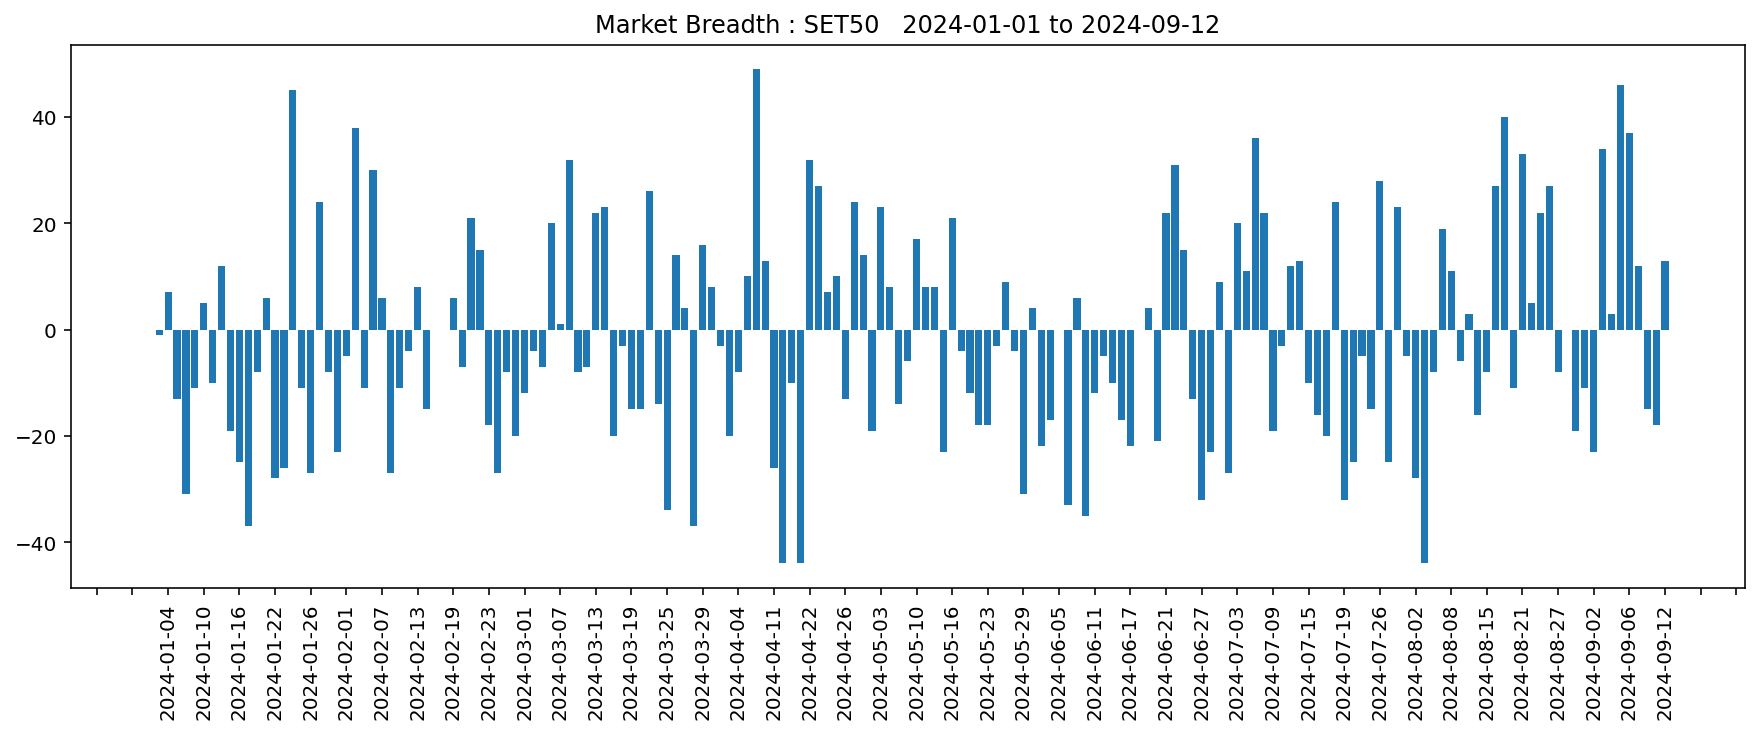

In [142]:
import matplotlib.dates as mdates

breadth = m2.sum(axis=1)
fig, ax = plt.subplots(figsize=(15,5))
plt.title('Market Breadth : SET50   2024-01-01 to 2024-09-12')
ax.bar(m2.index,breadth)
plt.xticks(rotation=90)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))  # ตั้งค่า interval เป็น 4 วันเว้น 4 วัน

plt.show()

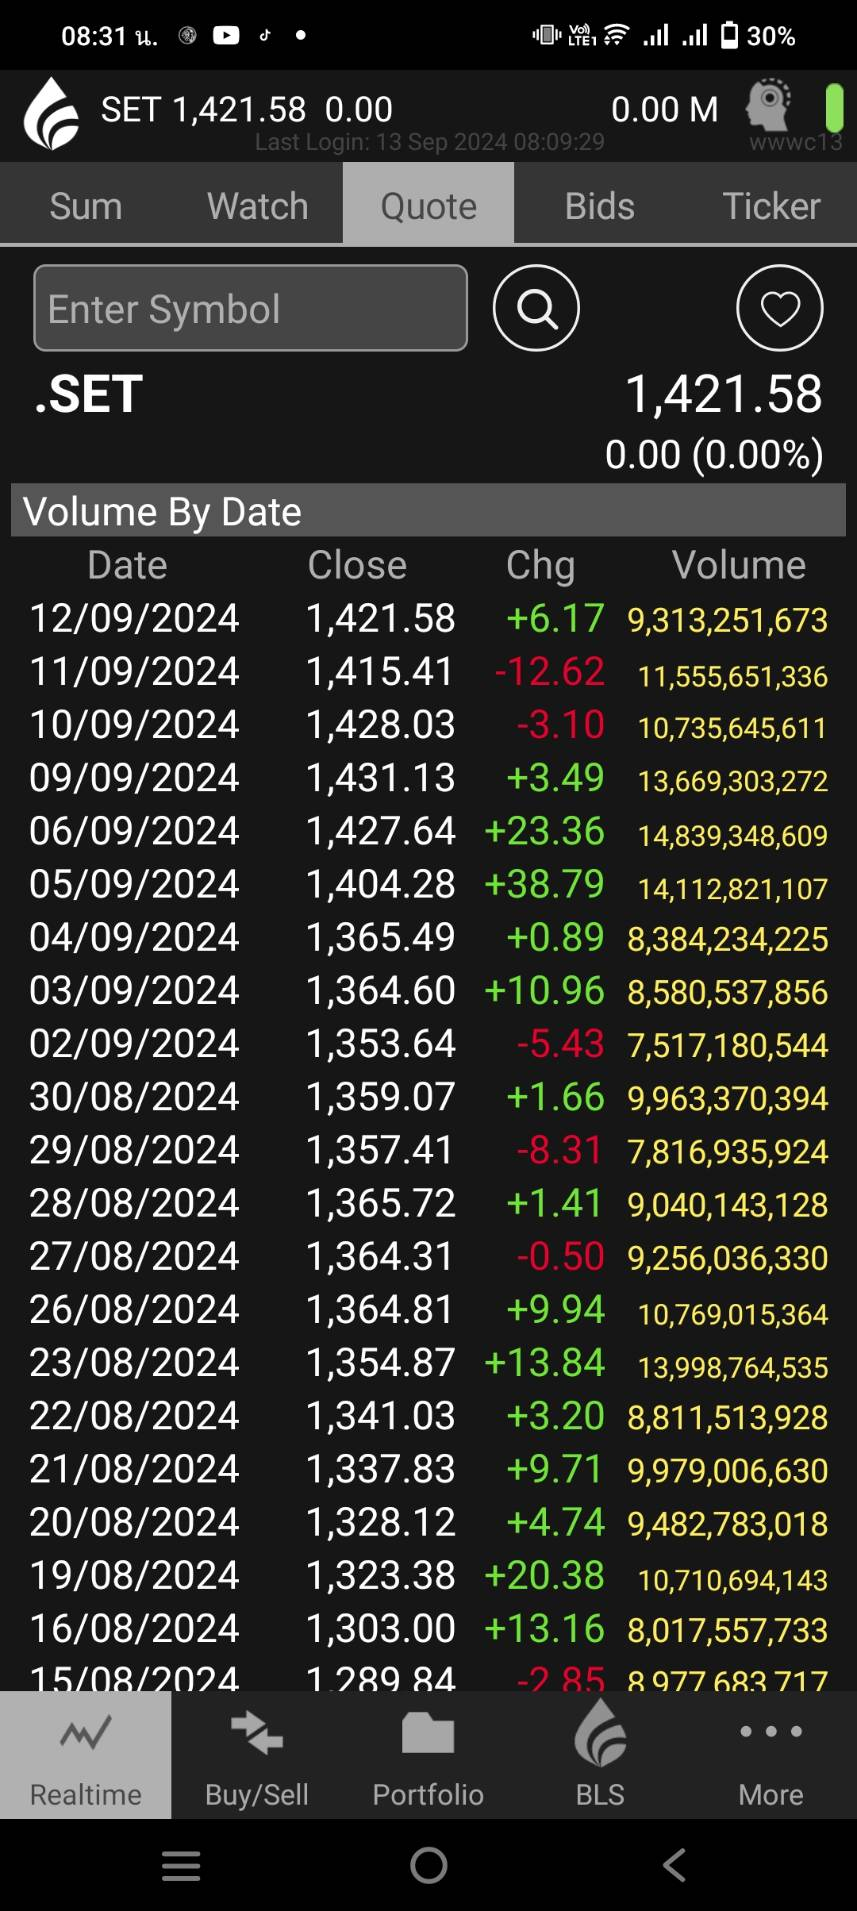

In [6]:
#![images](../_static/MarketBreadth.jpg)
from IPython.display import Image
Image("../_static/MarketBreadth.jpg", width=250)  # กำหนดความกว้างเป็น 300 พิกเซล

In [144]:
breadth.sort_index(ascending=False)#tail(10)

Date
2024-09-12    13
2024-09-11   -18
2024-09-10   -15
2024-09-09    12
2024-09-06    37
              ..
2024-01-08   -31
2024-01-05   -13
2024-01-04     7
2024-01-03    -1
2024-01-02     0
Length: 171, dtype: int64

## 52 Week high to low Range
- ดูภาพรวมตลาดว่ามีหุ้นใกล้ 52 Week มากน้อยแค่ไหน โดยเทียบกับ ROC ในรอบช่วงเวลา
- เราใช้ ROC (Rate of Change) สำหรับแกน X ของข้อมูล 

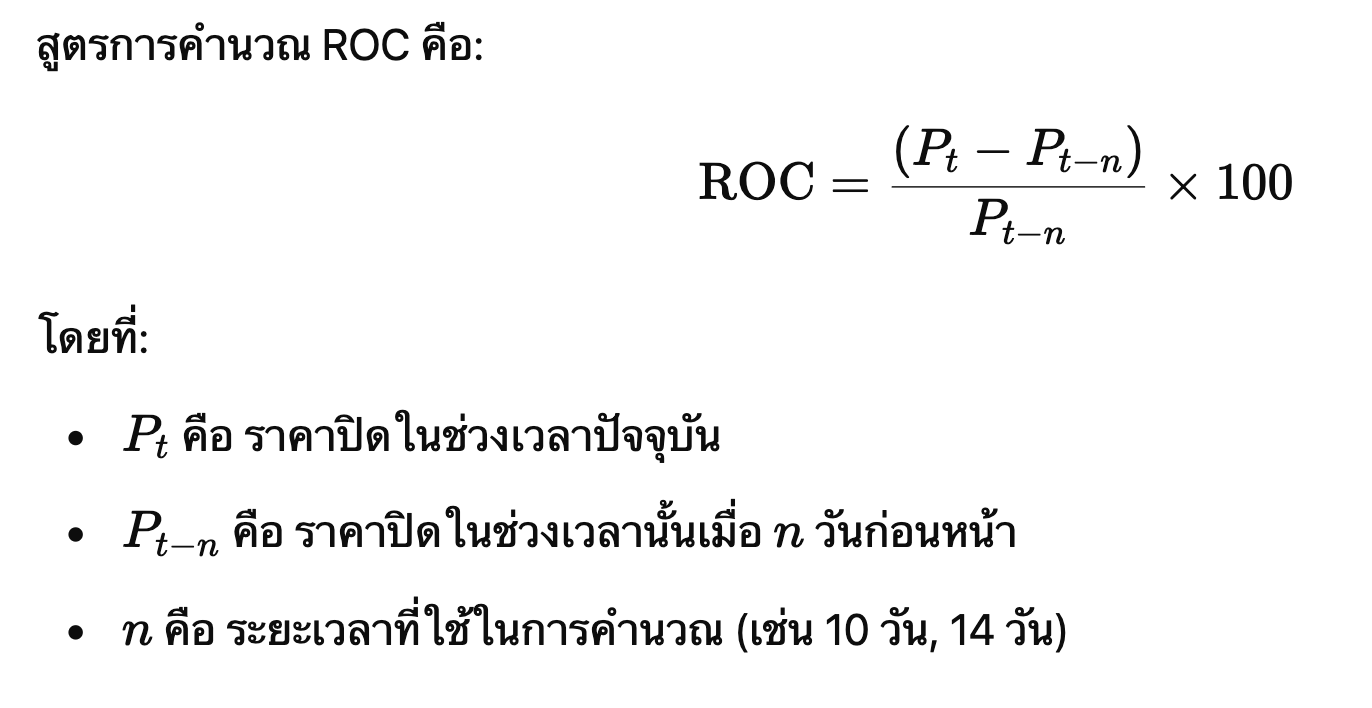

In [13]:
Image("../_static/ROC.png", width=400)  # กำหนดความกว้างเป็น 300 พิกเซล

In [191]:
# first step run 'get_init_data' before call
df = pd.read_csv('marketview.csv',index_col='Date')
b =  pd.read_csv('symbol_list.csv',index_col='symbol')

In [333]:
from starfishXapi.set_api import indexType
b = sx.get_member_of_index(indexType.set50)
for i in b['symbol']:
  print(i,end=',')  

ADVANC,AOT,AWC,BBL,BCP,BDMS,BEM,BGRIM,BH,BJC,BTS,CBG,CENTEL,CPALL,CPF,CPN,CRC,DELTA,EA,EGCO,GLOBAL,GPSC,GULF,HMPRO,INTUCH,ITC,IVL,KBANK,KTB,KTC,LH,MINT,MTC,OR,OSP,PTT,PTTEP,PTTGC,RATCH,SCB,SCC,SCGP,TIDLOR,TISCO,TLI,TOP,TRUE,TTB,TU,WHA,

In [421]:
import math

ROC = []
W52H = [] 
N = 10
c = 0
for i in b['symbol']:#b.index:
  lastPrice = df[i+'_c'].iloc[-1] 
  w52h_data = df[i+'_h'].dropna().rolling(window=252).max().iloc[-1]  
  if(math.isnan(w52h_data)):  
    if len(df[i+'_h'].dropna()) < 252: # ป้องกันหุ้นที่พึ่งเข้าตลาดมา ระยะเวลาไม่ถึง 252 วัน
      w52h_data = df[i+'_h'].dropna().max()#.iloc[-1]   
    
  priceT_N = df[i+'_c'].iloc[-N]  
  roc_ = ((lastPrice-priceT_N)/priceT_N)*100
  roc_ = round(roc_,4)
  w52_ = 1 - ((w52h_data - lastPrice)/lastPrice)
  w52_ = round(w52_*100,4)  

  ROC.append(roc_)
  W52H.append(w52_)  

In [423]:
report = pd.DataFrame({'ROC':ROC,'W52H':W52H,'symbol':b['symbol']})

# outlier
report = report.drop(report[report['symbol']=='EA'].index)
#report = report.drop(report[report['symbol']=='BTS'].index)

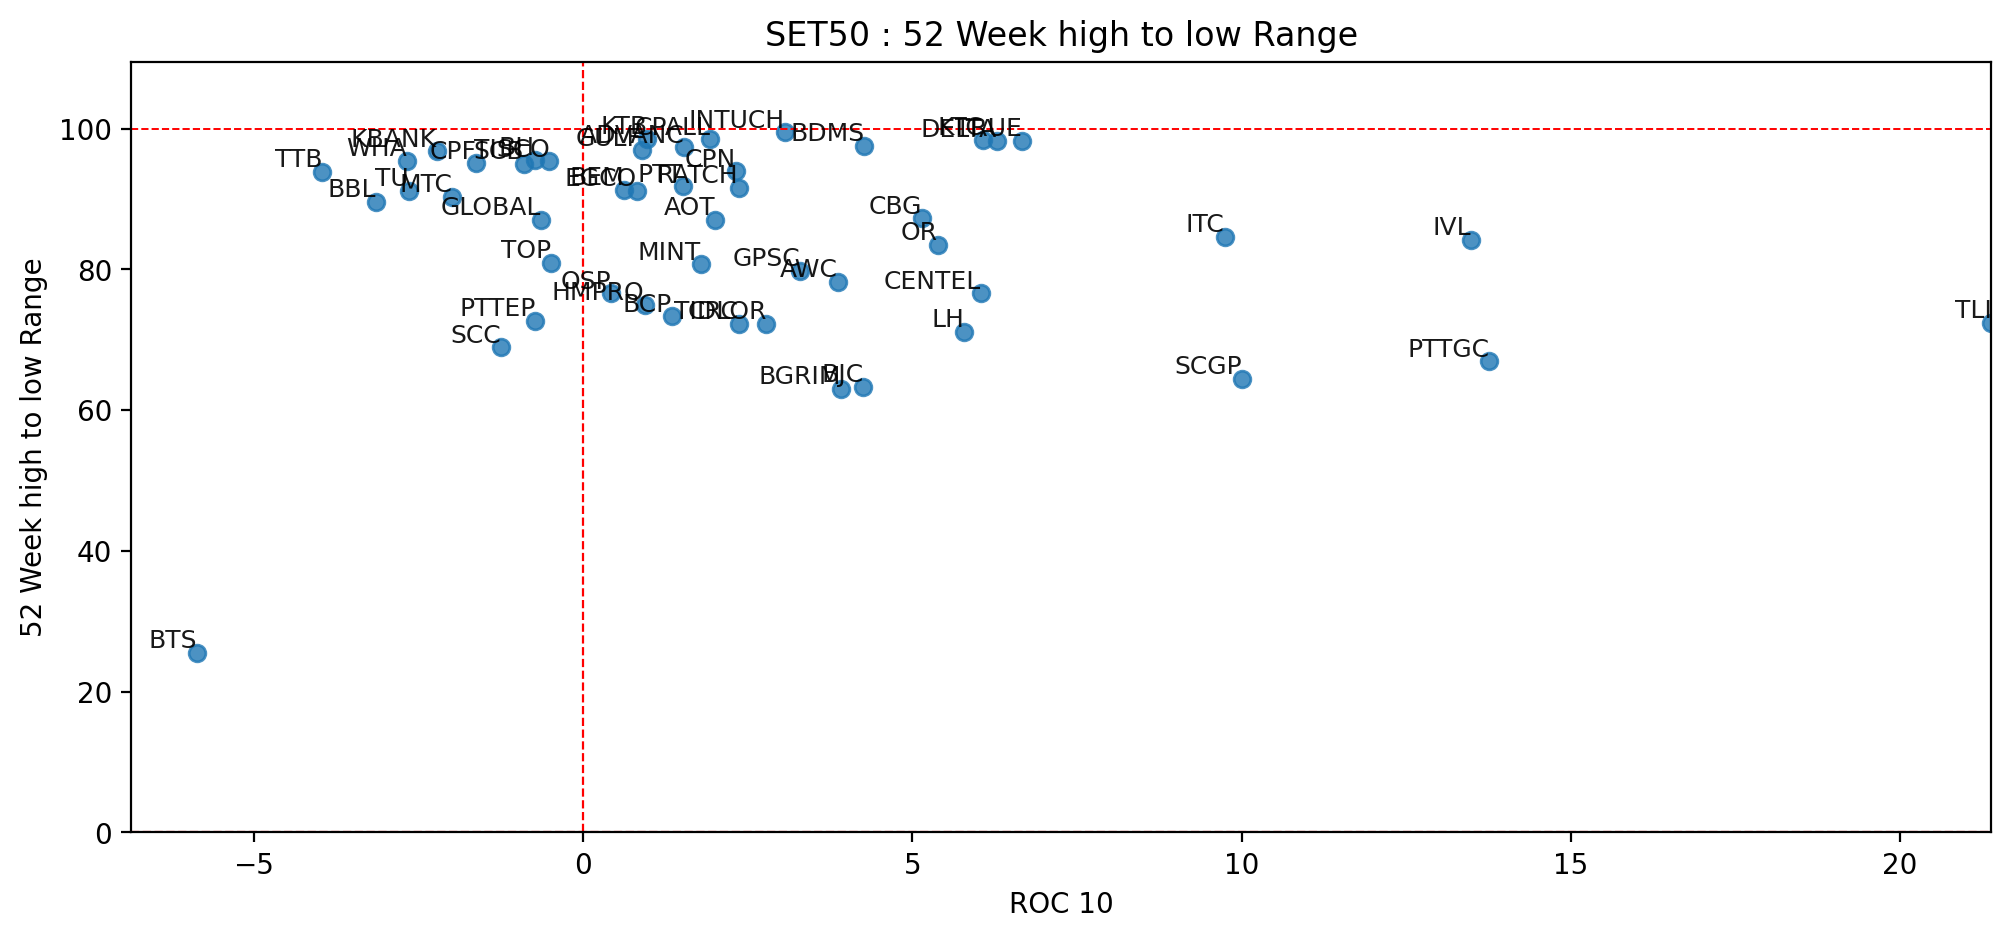

In [463]:
ROC_ = report['ROC']
W52H_ = report['W52H']
plt.subplots(figsize=(12,5))
plt.scatter(ROC_,W52H_,alpha=0.8)
plt.title('SET50 : 52 Week high to low Range')
plt.xlabel('ROC 10')
plt.ylabel('52 Week high to low Range')

# เพิ่มเส้นแกน X และ Y
plt.axhline(0, color='red',linewidth=0.8,linestyle='--')  # เส้นแกน Y ผ่านจุด 0
plt.axvline(0, color='red',linewidth=0.8,linestyle='--')  # เส้นแกน X ผ่านจุด 0

plt.axhline(100, color='red',linewidth=0.7,linestyle='--')  # เส้นแกน Y ผ่านจุด 0

labels = list(report['symbol'])
x = list(ROC_)
y = list(W52H_)

# ตั้งค่าการแสดงผลแกน X และ Y ให้มีช่วงที่เหมาะสม
plt.xlim(min(x)-1, max(x))  # ขยายขอบเขตของแกน X

y1 = abs(min(y))
y2 = abs(max(y))
yk = max(y1,y2)
#plt.ylim((yk*-1)*1.2, yk*1.2)  # ขยายขอบเขตของแกน Y
plt.ylim(0, yk*1.1)  # ขยายขอบเขตของแกน Y

# เพิ่ม label บนแต่ละจุด
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, fontsize=9, ha='right', va='bottom',alpha=0.9)
    if np.isfinite(y[i])==False:
      print(i,label)  
    if np.isfinite(x[i])==False:
      print(i,label)     
plt.show()

เราจะมาดูภาพรวมของตลาดว่าเป็นอย่างไรบ้างด้วยท่าของ 52 Week high to low range ผ่านตัวแทนคือสมาชิกใน SET 50 Index <br>

Concept คือหาว่าราคาปิดของหุ้นมีความห่างจากราคา 52 Week High มาน้อยแค่ไหนคิดเป็นเปอร์เซ็นต์เป็นแกน Y และอัตราการเปลี่ยนแปลงของราคาในรอบ 10 วันเป็นแกน X โดยหากจำนวนของหุ้นในกลุ่มสมาชิกกระจุยตัวในขวาบนยิ่งเยอะ ตลาดยิ่งกระทิง<br>

จากภาพช่วงนี้ 26 กันยายน 2024 สมาชิกใน SET50 Index มีสมาชิกถึงประมาณ 75% ที่ราคาใกล้เส้น 52 Week High มาก (คำว่าใกล้คือราคาปิดห่างกับราคา 52 Week High ไม่เกิน 25%)<br>
ตัวอย่างเช่น intuch อยู่เกือบทับเส้น 100 ในแกน Y คือ intuch ราคาปัจจุบันใกล้ 52 Week High สุดๆ
ในแกน X อัตราการเปลี่ยนแปลงในระยะสั้นในเวลา 10 วัน มีหุ้นใน SET50 ให้ผลตอบแทนเป็นบวกประมาณ 70% และอีก 30% ให้ผลตอบแทนในระยะสั้นเป็นลบ

In [465]:
(len(report[report['ROC']<0])/len(report))*100 , (len(report[report['ROC']>=0])/len(report))*100

(30.612244897959183, 69.38775510204081)

In [467]:
(len(report[report['W52H']>=75])/len(report))*100

75.51020408163265